## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data

In [3]:
df = pd.read_csv("E:\Alfido intern\ecommerce_customer_data_custom_ratios.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\bhara\AppData\Local\Temp\ipykernel_6812\2206434762.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("E:\Alfido intern\ecommerce_customer_data_custom_ratios.csv")


## Exploring the dataset

In [4]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [5]:
df.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1
249999,16971,2021-03-13 16:28:35,Electronics,425,4,2370,Cash,36,1.0,Justin Lawson,36,Female,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


## Data Preprocessing 

In [7]:
df.isnull()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

## Analysis & Visualization

In [12]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Female,101798
1,Male,100606


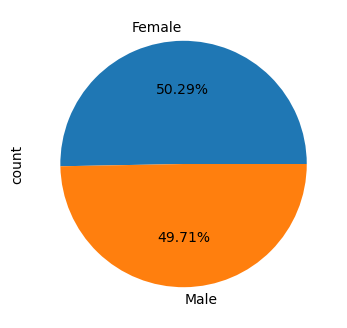

In [13]:
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

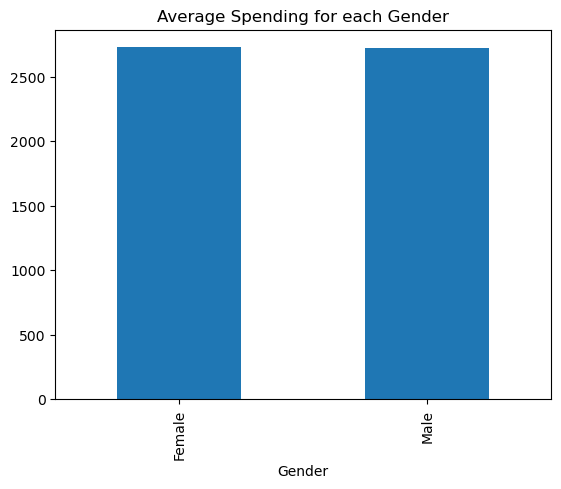

In [14]:
gender_spend = df.groupby('Gender')['Total Purchase Amount'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

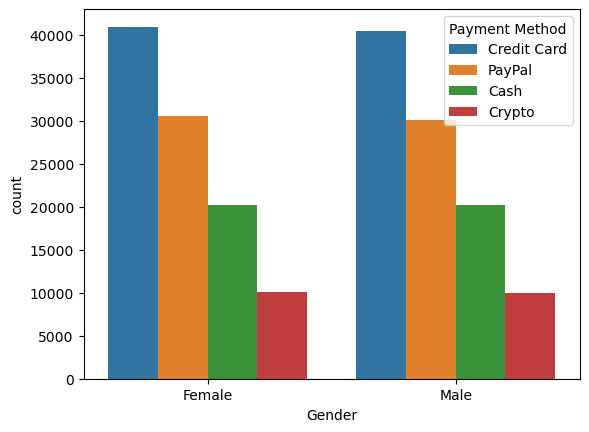

In [15]:
gender_membership = df[['Gender', 'Payment Method']].value_counts().reset_index()
sns.barplot(data=gender_membership, x='Gender', y='count', hue='Payment Method')
plt.show()

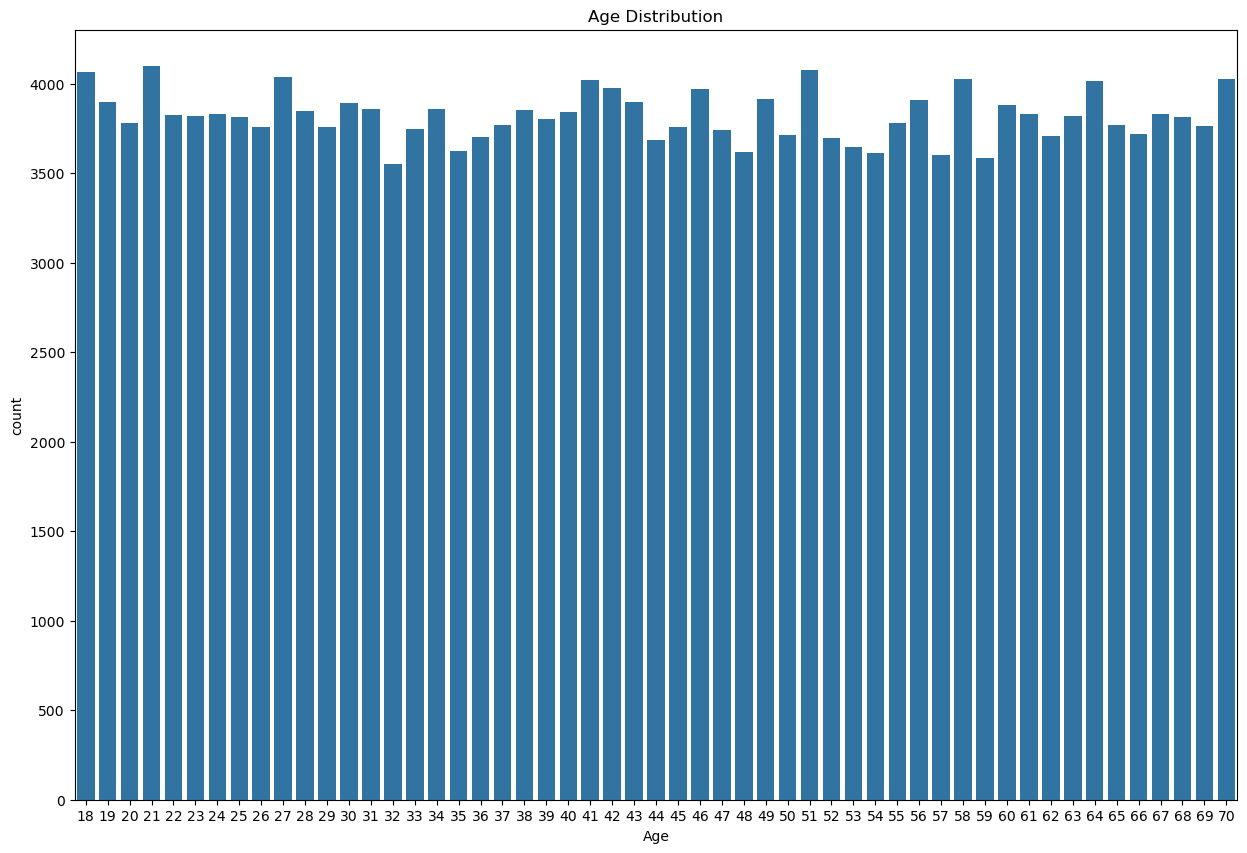

In [16]:
age_data = df['Age'].value_counts().reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(data=age_data, x='Age', y='count')
plt.title("Age Distribution")
plt.show()

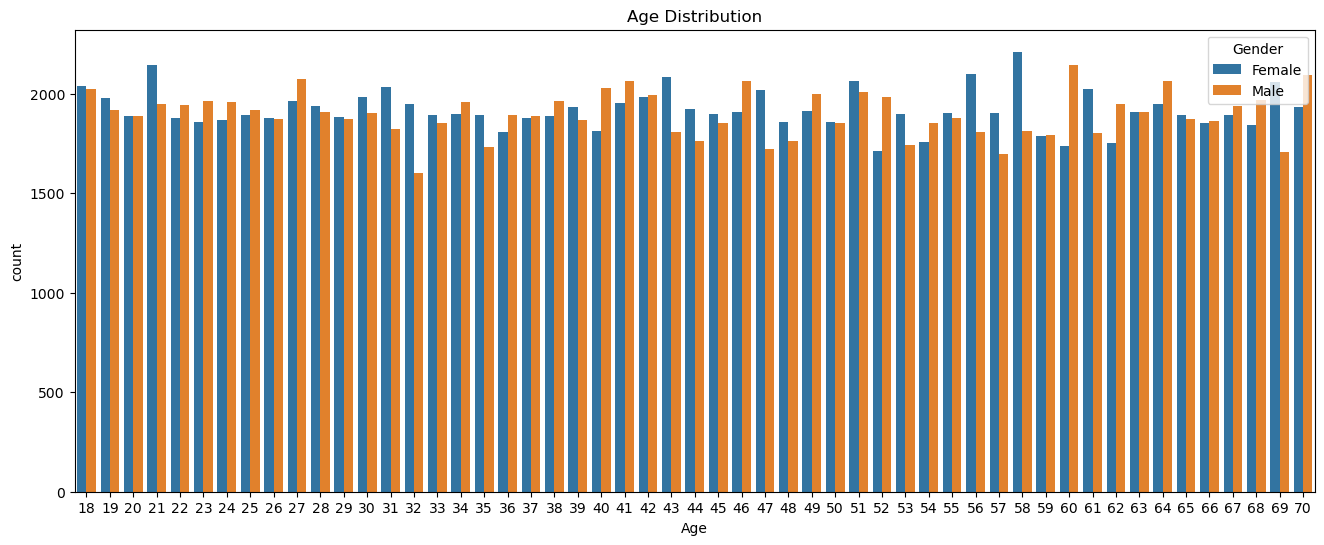

In [17]:
gender_age_data = df[['Gender', 'Age']].value_counts().reset_index().sort_values(ascending=False, by='count')
plt.figure(figsize=(16, 6))
sns.barplot(data=gender_age_data, x='Age', y='count', hue='Gender')
plt.title("Age Distribution")
plt.show()

In [18]:
age_grp=['18-46','47-70']
df['age_group'] = pd.cut(df.Age,bins=np.arange(15,46,15),labels=age_grp,right=True)
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,age_group
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,47-70
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,47-70
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,47-70
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,47-70
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,NaN


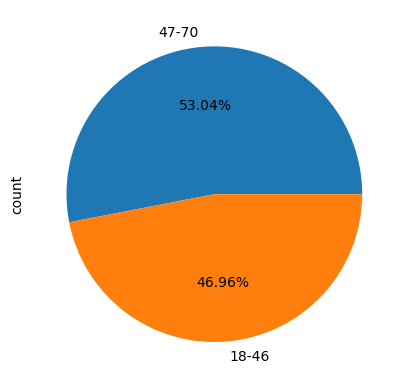

In [19]:
df['age_group'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

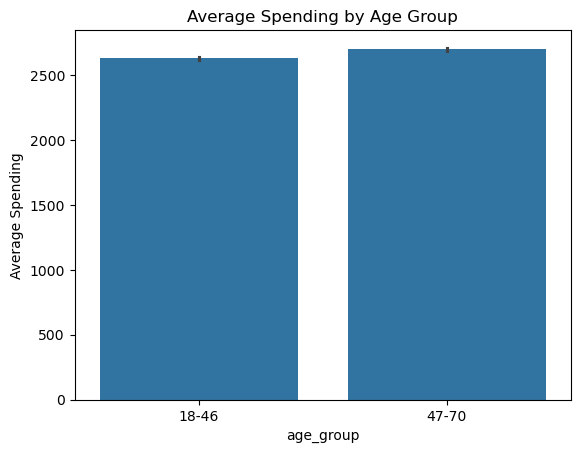

In [20]:
sns.barplot(data=df, x='age_group', y='Total Purchase Amount')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

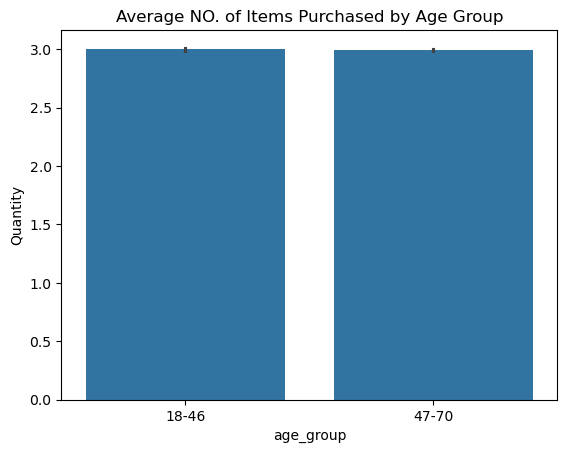

In [21]:
sns.barplot(data=df, x='age_group', y='Quantity')
plt.title('Average NO. of Items Purchased by Age Group')
plt.show()

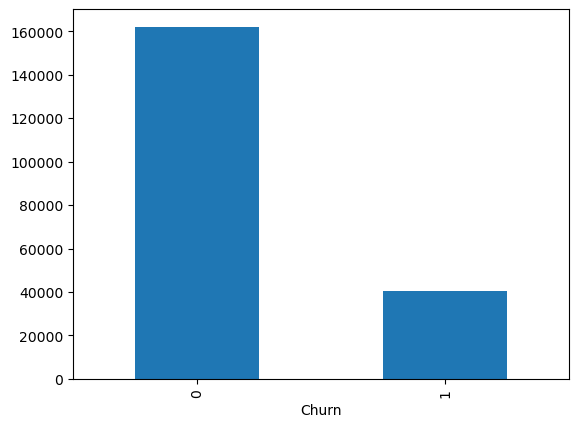

In [22]:
df['Churn'].value_counts().plot.bar()
plt.show()

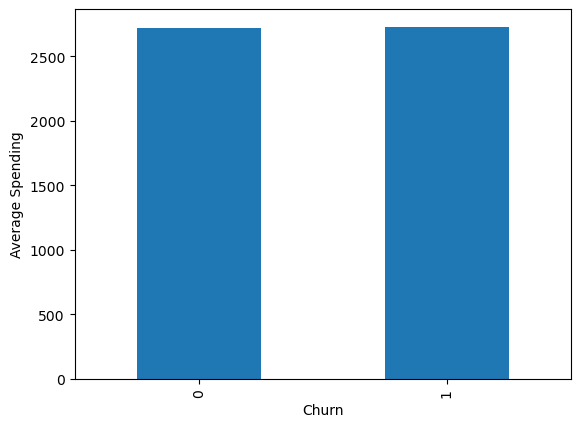

In [24]:
satisfaction_spend = df.groupby('Churn')['Total Purchase Amount'].mean()
satisfaction_spend.plot.bar()
plt.ylabel('Average Spending')
plt.show()

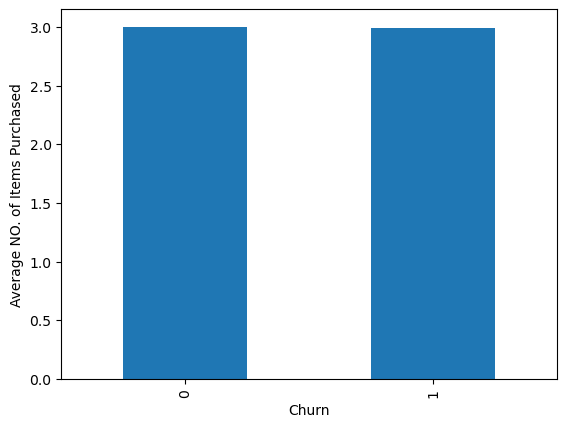

In [25]:
satisfaction_items = df.groupby('Churn')['Quantity'].mean()
satisfaction_items.plot.bar()
plt.ylabel('Average NO. of Items Purchased')
plt.show()